In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [15]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [16]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [7]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [18]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [8]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [9]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [10]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [11]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# 1.a)

118it [00:15,  7.86it/s]                                                                                               


Epoch 1 of 100
Generator loss: 0.01710989, Discriminator loss: 0.00301715


118it [00:15,  7.71it/s]                                                                                               


Epoch 2 of 100
Generator loss: 0.03313370, Discriminator loss: 0.00386725


118it [00:15,  7.83it/s]                                                                                               


Epoch 3 of 100
Generator loss: 0.00633059, Discriminator loss: 0.00980937


118it [00:15,  7.61it/s]                                                                                               


Epoch 4 of 100
Generator loss: 0.01908774, Discriminator loss: 0.00604328


118it [00:15,  7.82it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


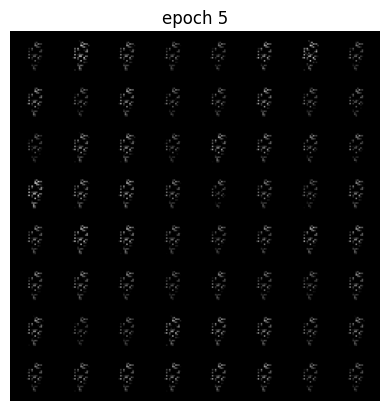

Epoch 5 of 100
Generator loss: 0.02759243, Discriminator loss: 0.00783950


118it [00:15,  7.76it/s]                                                                                               


Epoch 6 of 100
Generator loss: 0.00948722, Discriminator loss: 0.00900141


118it [00:15,  7.74it/s]                                                                                               


Epoch 7 of 100
Generator loss: 0.00244248, Discriminator loss: 0.02271979


118it [00:15,  7.75it/s]                                                                                               


Epoch 8 of 100
Generator loss: 0.00789782, Discriminator loss: 0.00863030


118it [00:15,  7.70it/s]                                                                                               


Epoch 9 of 100
Generator loss: 0.00602293, Discriminator loss: 0.01327580


118it [00:15,  7.79it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


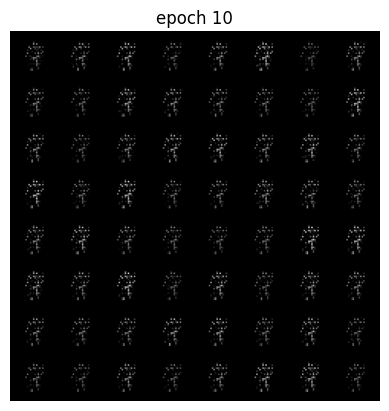

Epoch 10 of 100
Generator loss: 0.00703058, Discriminator loss: 0.01427099


118it [00:15,  7.71it/s]                                                                                               


Epoch 11 of 100
Generator loss: 0.01087117, Discriminator loss: 0.01443250


118it [00:15,  7.65it/s]                                                                                               


Epoch 12 of 100
Generator loss: 0.01614473, Discriminator loss: 0.01078083


118it [00:15,  7.57it/s]                                                                                               


Epoch 13 of 100
Generator loss: 0.00834994, Discriminator loss: 0.00841050


118it [00:15,  7.68it/s]                                                                                               


Epoch 14 of 100
Generator loss: 0.01050650, Discriminator loss: 0.01047494


118it [00:15,  7.70it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


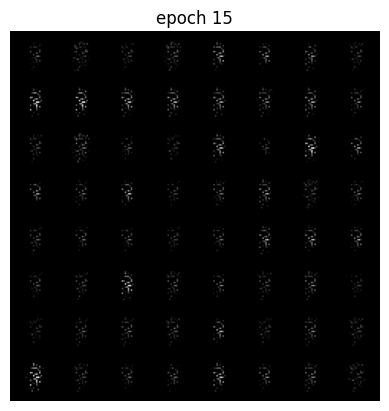

Epoch 15 of 100
Generator loss: 0.00553843, Discriminator loss: 0.01345309


118it [00:15,  7.72it/s]                                                                                               


Epoch 16 of 100
Generator loss: 0.00575718, Discriminator loss: 0.01215735


118it [00:15,  7.72it/s]                                                                                               


Epoch 17 of 100
Generator loss: 0.00857536, Discriminator loss: 0.00875486


118it [00:15,  7.78it/s]                                                                                               


Epoch 18 of 100
Generator loss: 0.01206807, Discriminator loss: 0.01093032


118it [00:15,  7.76it/s]                                                                                               


Epoch 19 of 100
Generator loss: 0.01509590, Discriminator loss: 0.00911865


118it [00:15,  7.65it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


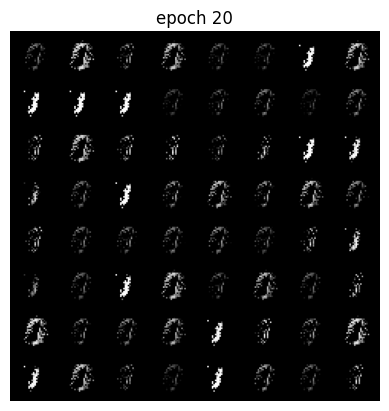

Epoch 20 of 100
Generator loss: 0.01876292, Discriminator loss: 0.00500464


118it [00:15,  7.51it/s]                                                                                               


Epoch 21 of 100
Generator loss: 0.03167925, Discriminator loss: 0.00753600


118it [00:15,  7.62it/s]                                                                                               


Epoch 22 of 100
Generator loss: 0.01755895, Discriminator loss: 0.00547688


118it [00:15,  7.65it/s]                                                                                               


Epoch 23 of 100
Generator loss: 0.01371299, Discriminator loss: 0.00893827


118it [00:15,  7.71it/s]                                                                                               


Epoch 24 of 100
Generator loss: 0.01639330, Discriminator loss: 0.00506990


118it [00:15,  7.62it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


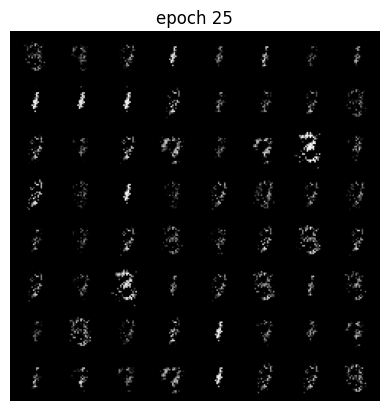

Epoch 25 of 100
Generator loss: 0.01711929, Discriminator loss: 0.00446715


118it [00:15,  7.65it/s]                                                                                               


Epoch 26 of 100
Generator loss: 0.02131825, Discriminator loss: 0.00325611


118it [00:15,  7.63it/s]                                                                                               


Epoch 27 of 100
Generator loss: 0.01431988, Discriminator loss: 0.00542657


118it [00:15,  7.62it/s]                                                                                               


Epoch 28 of 100
Generator loss: 0.01796413, Discriminator loss: 0.00789592


118it [00:15,  7.70it/s]                                                                                               


Epoch 29 of 100
Generator loss: 0.01581008, Discriminator loss: 0.00901312


118it [00:15,  7.64it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


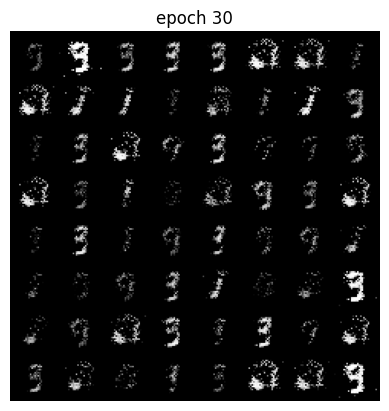

Epoch 30 of 100
Generator loss: 0.01620444, Discriminator loss: 0.00457568


118it [00:15,  7.64it/s]                                                                                               


Epoch 31 of 100
Generator loss: 0.01523840, Discriminator loss: 0.00582472


118it [00:15,  7.54it/s]                                                                                               


Epoch 32 of 100
Generator loss: 0.01197579, Discriminator loss: 0.00624082


118it [00:15,  7.50it/s]                                                                                               


Epoch 33 of 100
Generator loss: 0.01907177, Discriminator loss: 0.00493274


118it [00:15,  7.63it/s]                                                                                               


Epoch 34 of 100
Generator loss: 0.02175989, Discriminator loss: 0.00401053


118it [00:15,  7.49it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


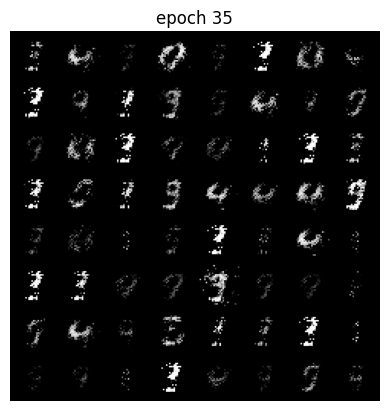

Epoch 35 of 100
Generator loss: 0.01599930, Discriminator loss: 0.00699371


118it [00:15,  7.63it/s]                                                                                               


Epoch 36 of 100
Generator loss: 0.01809478, Discriminator loss: 0.00671680


118it [00:15,  7.67it/s]                                                                                               


Epoch 37 of 100
Generator loss: 0.02273855, Discriminator loss: 0.00374753


118it [00:15,  7.61it/s]                                                                                               


Epoch 38 of 100
Generator loss: 0.01793640, Discriminator loss: 0.00648733


118it [00:15,  7.54it/s]                                                                                               


Epoch 39 of 100
Generator loss: 0.01990301, Discriminator loss: 0.00585240


118it [00:15,  7.57it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


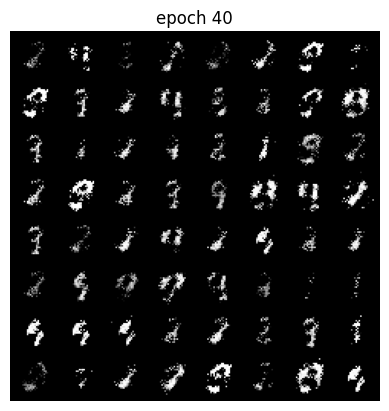

Epoch 40 of 100
Generator loss: 0.01514190, Discriminator loss: 0.00526874


118it [00:15,  7.66it/s]                                                                                               


Epoch 41 of 100
Generator loss: 0.01474242, Discriminator loss: 0.00563532


118it [00:15,  7.70it/s]                                                                                               


Epoch 42 of 100
Generator loss: 0.01609613, Discriminator loss: 0.00576191


118it [00:16,  7.21it/s]                                                                                               


Epoch 43 of 100
Generator loss: 0.01515934, Discriminator loss: 0.00659025


118it [00:15,  7.58it/s]                                                                                               


Epoch 44 of 100
Generator loss: 0.01532639, Discriminator loss: 0.00530895


118it [00:15,  7.46it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


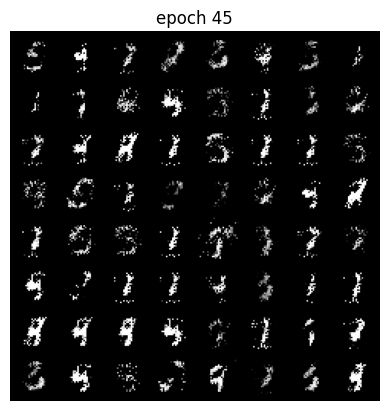

Epoch 45 of 100
Generator loss: 0.01648874, Discriminator loss: 0.00739828


118it [00:15,  7.64it/s]                                                                                               


Epoch 46 of 100
Generator loss: 0.01759728, Discriminator loss: 0.00834764


118it [00:15,  7.60it/s]                                                                                               


Epoch 47 of 100
Generator loss: 0.01966167, Discriminator loss: 0.00606197


118it [00:15,  7.64it/s]                                                                                               


Epoch 48 of 100
Generator loss: 0.01708468, Discriminator loss: 0.00641491


118it [00:15,  7.56it/s]                                                                                               


Epoch 49 of 100
Generator loss: 0.02267462, Discriminator loss: 0.00629743


118it [00:15,  7.64it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


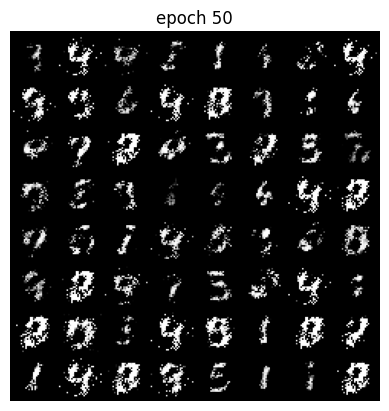

Epoch 50 of 100
Generator loss: 0.02369639, Discriminator loss: 0.00581896


118it [00:15,  7.54it/s]                                                                                               


Epoch 51 of 100
Generator loss: 0.02098549, Discriminator loss: 0.00466434


118it [00:15,  7.56it/s]                                                                                               


Epoch 52 of 100
Generator loss: 0.01789394, Discriminator loss: 0.00563099


118it [00:15,  7.64it/s]                                                                                               


Epoch 53 of 100
Generator loss: 0.01652145, Discriminator loss: 0.00671602


118it [00:15,  7.52it/s]                                                                                               


Epoch 54 of 100
Generator loss: 0.01720719, Discriminator loss: 0.00533653


118it [00:15,  7.62it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


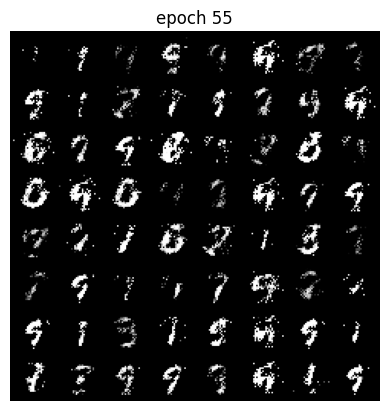

Epoch 55 of 100
Generator loss: 0.02137912, Discriminator loss: 0.00620064


118it [00:15,  7.52it/s]                                                                                               


Epoch 56 of 100
Generator loss: 0.02468852, Discriminator loss: 0.00681551


118it [00:15,  7.59it/s]                                                                                               


Epoch 57 of 100
Generator loss: 0.02167876, Discriminator loss: 0.00604063


118it [00:15,  7.54it/s]                                                                                               


Epoch 58 of 100
Generator loss: 0.02569552, Discriminator loss: 0.00528687


118it [00:15,  7.55it/s]                                                                                               


Epoch 59 of 100
Generator loss: 0.01641067, Discriminator loss: 0.00691940


118it [00:15,  7.64it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


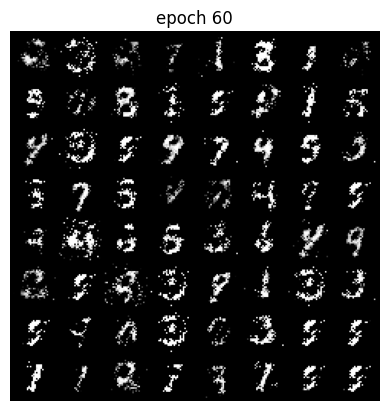

Epoch 60 of 100
Generator loss: 0.01773921, Discriminator loss: 0.00489698


118it [00:15,  7.38it/s]                                                                                               


Epoch 61 of 100
Generator loss: 0.02051293, Discriminator loss: 0.00516194


118it [00:15,  7.60it/s]                                                                                               


Epoch 62 of 100
Generator loss: 0.01885600, Discriminator loss: 0.00490134


118it [00:15,  7.55it/s]                                                                                               


Epoch 63 of 100
Generator loss: 0.01895579, Discriminator loss: 0.00625214


118it [00:15,  7.50it/s]                                                                                               


Epoch 64 of 100
Generator loss: 0.02046102, Discriminator loss: 0.00835328


118it [00:15,  7.53it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


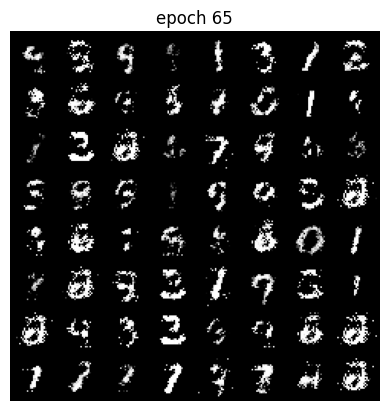

Epoch 65 of 100
Generator loss: 0.01776957, Discriminator loss: 0.00706332


118it [00:15,  7.57it/s]                                                                                               


Epoch 66 of 100
Generator loss: 0.02039481, Discriminator loss: 0.00593498


118it [00:15,  7.55it/s]                                                                                               


Epoch 67 of 100
Generator loss: 0.01792519, Discriminator loss: 0.00709300


118it [00:15,  7.52it/s]                                                                                               


Epoch 68 of 100
Generator loss: 0.02258199, Discriminator loss: 0.00659543


118it [00:15,  7.55it/s]                                                                                               


Epoch 69 of 100
Generator loss: 0.01971818, Discriminator loss: 0.00448552


118it [00:15,  7.52it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


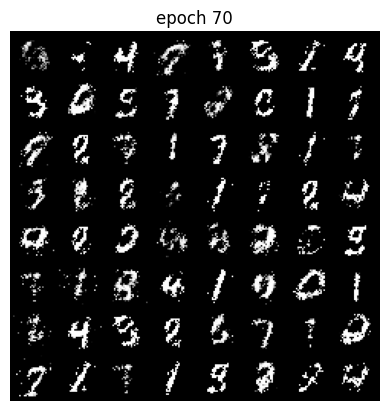

Epoch 70 of 100
Generator loss: 0.01617094, Discriminator loss: 0.00607907


118it [00:15,  7.49it/s]                                                                                               


Epoch 71 of 100
Generator loss: 0.01901880, Discriminator loss: 0.00758728


118it [00:15,  7.57it/s]                                                                                               


Epoch 72 of 100
Generator loss: 0.02036652, Discriminator loss: 0.00616938


118it [00:15,  7.49it/s]                                                                                               


Epoch 73 of 100
Generator loss: 0.01810660, Discriminator loss: 0.00605635


118it [00:15,  7.55it/s]                                                                                               


Epoch 74 of 100
Generator loss: 0.01762215, Discriminator loss: 0.00474538


118it [00:15,  7.56it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


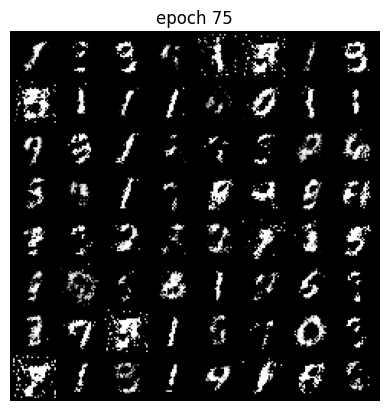

Epoch 75 of 100
Generator loss: 0.02213533, Discriminator loss: 0.00591952


118it [00:15,  7.57it/s]                                                                                               


Epoch 76 of 100
Generator loss: 0.01707909, Discriminator loss: 0.00469371


118it [00:15,  7.48it/s]                                                                                               


Epoch 77 of 100
Generator loss: 0.02195503, Discriminator loss: 0.00567455


118it [00:15,  7.65it/s]                                                                                               


Epoch 78 of 100
Generator loss: 0.02118217, Discriminator loss: 0.00522877


118it [00:15,  7.55it/s]                                                                                               


Epoch 79 of 100
Generator loss: 0.02125358, Discriminator loss: 0.00502485


118it [00:15,  7.60it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


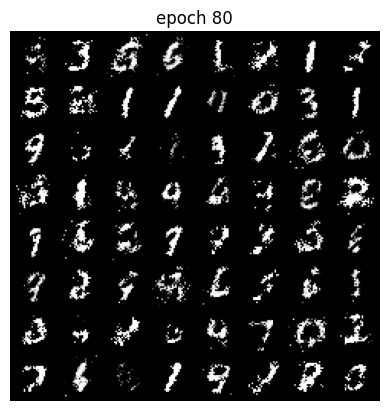

Epoch 80 of 100
Generator loss: 0.01978657, Discriminator loss: 0.00623060


118it [00:15,  7.59it/s]                                                                                               


Epoch 81 of 100
Generator loss: 0.01546118, Discriminator loss: 0.00619545


118it [00:15,  7.69it/s]                                                                                               


Epoch 82 of 100
Generator loss: 0.01978941, Discriminator loss: 0.00546614


118it [00:15,  7.57it/s]                                                                                               


Epoch 83 of 100
Generator loss: 0.01414842, Discriminator loss: 0.00669700


118it [00:15,  7.53it/s]                                                                                               


Epoch 84 of 100
Generator loss: 0.01367965, Discriminator loss: 0.00715143


118it [00:15,  7.57it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


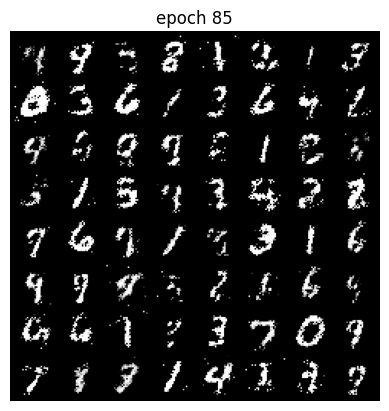

Epoch 85 of 100
Generator loss: 0.01870961, Discriminator loss: 0.00701917


118it [00:15,  7.60it/s]                                                                                               


Epoch 86 of 100
Generator loss: 0.01614118, Discriminator loss: 0.00602911


118it [00:15,  7.55it/s]                                                                                               


Epoch 87 of 100
Generator loss: 0.01617110, Discriminator loss: 0.00649678


118it [00:15,  7.61it/s]                                                                                               


Epoch 88 of 100
Generator loss: 0.02143732, Discriminator loss: 0.00541107


118it [00:15,  7.67it/s]                                                                                               


Epoch 89 of 100
Generator loss: 0.01730997, Discriminator loss: 0.00659486


118it [00:15,  7.50it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


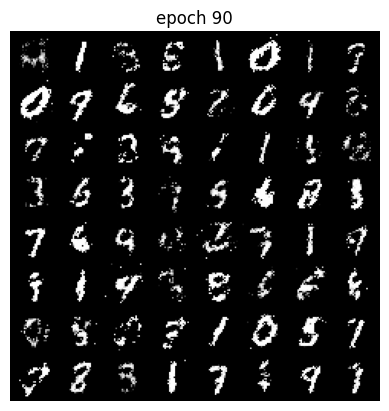

Epoch 90 of 100
Generator loss: 0.01759535, Discriminator loss: 0.00583408


118it [00:15,  7.60it/s]                                                                                               


Epoch 91 of 100
Generator loss: 0.01556674, Discriminator loss: 0.00655257


118it [00:15,  7.57it/s]                                                                                               


Epoch 92 of 100
Generator loss: 0.01931019, Discriminator loss: 0.00671001


118it [00:15,  7.62it/s]                                                                                               


Epoch 93 of 100
Generator loss: 0.01610606, Discriminator loss: 0.00616871


118it [00:15,  7.58it/s]                                                                                               


Epoch 94 of 100
Generator loss: 0.01762591, Discriminator loss: 0.00764427


118it [00:15,  7.53it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


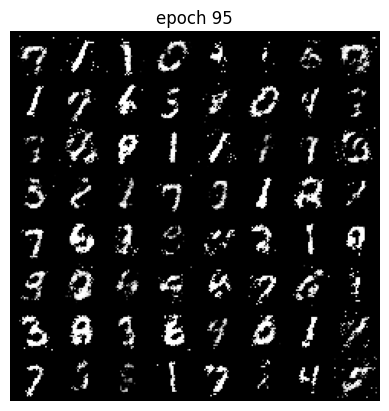

Epoch 95 of 100
Generator loss: 0.01808495, Discriminator loss: 0.00698154


118it [00:15,  7.58it/s]                                                                                               


Epoch 96 of 100
Generator loss: 0.01579819, Discriminator loss: 0.00632426


118it [00:15,  7.66it/s]                                                                                               


Epoch 97 of 100
Generator loss: 0.01906881, Discriminator loss: 0.00557020


118it [00:15,  7.59it/s]                                                                                               


Epoch 98 of 100
Generator loss: 0.01479954, Discriminator loss: 0.00617044


118it [00:15,  7.64it/s]                                                                                               


Epoch 99 of 100
Generator loss: 0.01711629, Discriminator loss: 0.00718030


118it [00:15,  7.65it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


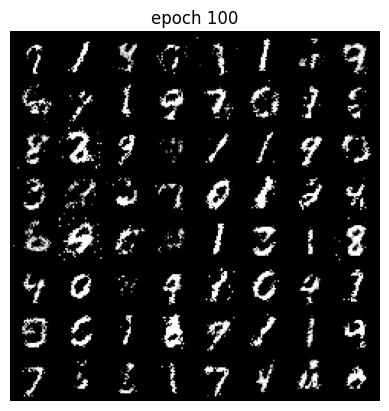

Epoch 100 of 100
Generator loss: 0.01958000, Discriminator loss: 0.00756944


In [23]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return -1 * (torch.sum(torch.log(output) / nz))
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return -1*((torch.sum(torch.log(true_label)) / batch_size) + (torch.sum(torch.log(1 - output)) / nz) )
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        optim_g.zero_grad()
        optim_d.zero_grad()
        
        x, _ = data[0], data[1]
        real_labels = label_real(sample_size)
        fake_labels = label_fake(sample_size)

        D_x = discriminator(x)
        loss_d1 = criterion(D_x, label_real(x.shape[0]))
        loss_d1.backward()

        fake_img = generator(noise)
        D_G_z = discriminator(fake_img.detach())
        loss_d2 = criterion(D_G_z, fake_labels)
        loss_d2.backward()

        loss_d = loss_d1 + loss_d2

        optim_d.step()
        
        loss_g = criterion(discriminator(fake_img), real_labels)
        loss_g.backward()
        optim_g.step()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach())
    losses_d.append(epoch_loss_d.detach())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [24]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [25]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

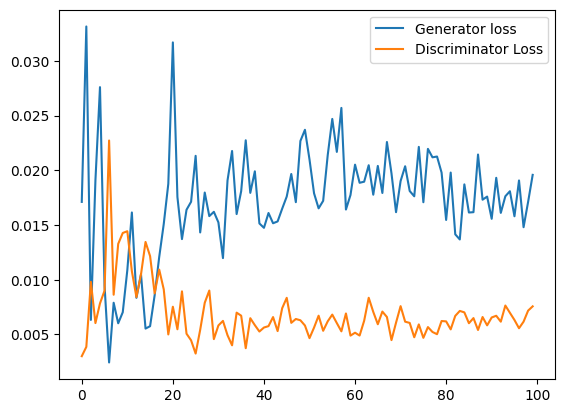

In [26]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

# 1.b)

In [19]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)

In [21]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

118it [00:14,  7.91it/s]                                                                                               


Epoch 1 of 100
Generator loss: -0.71574908, Discriminator loss: 0.00000096


118it [00:15,  7.61it/s]                                                                                               


Epoch 2 of 100
Generator loss: -0.71286774, Discriminator loss: 0.00000034


118it [00:15,  7.47it/s]                                                                                               


Epoch 3 of 100
Generator loss: -0.71504581, Discriminator loss: 0.00000002


118it [00:15,  7.43it/s]                                                                                               


Epoch 4 of 100
Generator loss: -0.72025871, Discriminator loss: 0.00000028


118it [00:16,  7.27it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


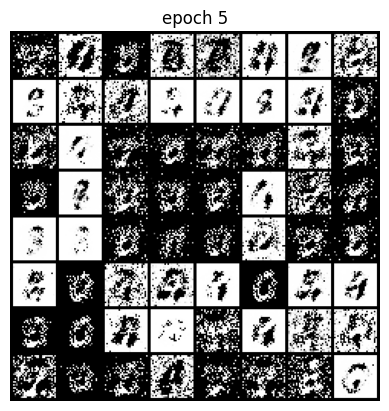

Epoch 5 of 100
Generator loss: -0.71683657, Discriminator loss: 0.00000010


118it [00:16,  7.20it/s]                                                                                               


Epoch 6 of 100
Generator loss: -0.71298212, Discriminator loss: 0.00000004


118it [00:16,  7.11it/s]                                                                                               


Epoch 7 of 100
Generator loss: -0.71455497, Discriminator loss: 0.00000007


118it [00:16,  7.09it/s]                                                                                               


Epoch 8 of 100
Generator loss: -0.71277130, Discriminator loss: 0.00000001


118it [00:17,  6.93it/s]                                                                                               


Epoch 9 of 100
Generator loss: -0.71381247, Discriminator loss: 0.00000001


118it [00:16,  6.98it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


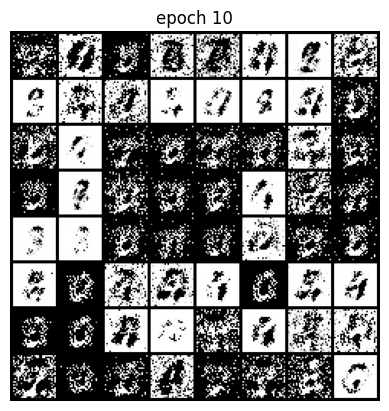

Epoch 10 of 100
Generator loss: -0.72072279, Discriminator loss: 0.00000002


118it [00:16,  7.22it/s]                                                                                               


Epoch 11 of 100
Generator loss: -0.71829319, Discriminator loss: 0.00000001


118it [00:16,  7.26it/s]                                                                                               


Epoch 12 of 100
Generator loss: -0.72754312, Discriminator loss: 0.00000000


118it [00:16,  7.24it/s]                                                                                               


Epoch 13 of 100
Generator loss: -0.72137058, Discriminator loss: 0.00000001


118it [00:16,  7.26it/s]                                                                                               


Epoch 14 of 100
Generator loss: -0.72139215, Discriminator loss: 0.00000000


118it [00:16,  7.10it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


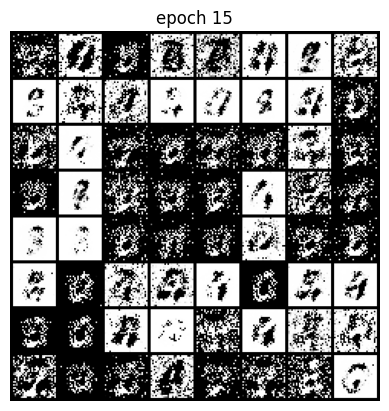

Epoch 15 of 100
Generator loss: -0.72527033, Discriminator loss: 0.00000001


118it [00:16,  7.21it/s]                                                                                               


Epoch 16 of 100
Generator loss: -0.71937948, Discriminator loss: 0.00000000


118it [00:16,  7.08it/s]                                                                                               


Epoch 17 of 100
Generator loss: -0.72072697, Discriminator loss: 0.00000004


118it [00:16,  7.23it/s]                                                                                               


Epoch 18 of 100
Generator loss: -0.73282194, Discriminator loss: 0.00000000


118it [00:16,  7.17it/s]                                                                                               


Epoch 19 of 100
Generator loss: -0.73088568, Discriminator loss: 0.00000000


118it [00:16,  7.22it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


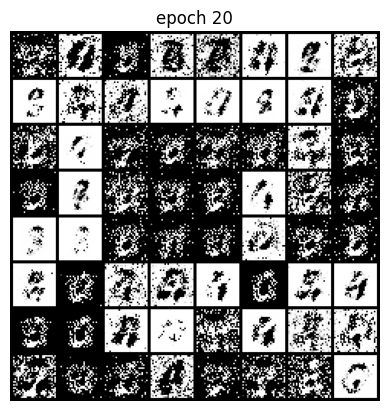

Epoch 20 of 100
Generator loss: -0.72996294, Discriminator loss: 0.00000012


118it [00:16,  7.17it/s]                                                                                               


Epoch 21 of 100
Generator loss: -0.74388313, Discriminator loss: 0.00000001


118it [00:16,  7.07it/s]                                                                                               


Epoch 22 of 100
Generator loss: -0.73746961, Discriminator loss: 0.00000007


118it [00:16,  7.14it/s]                                                                                               


Epoch 23 of 100
Generator loss: -0.74264938, Discriminator loss: 0.00000000


118it [00:16,  7.18it/s]                                                                                               


Epoch 24 of 100
Generator loss: -0.73539108, Discriminator loss: 0.00000000


118it [00:16,  7.15it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


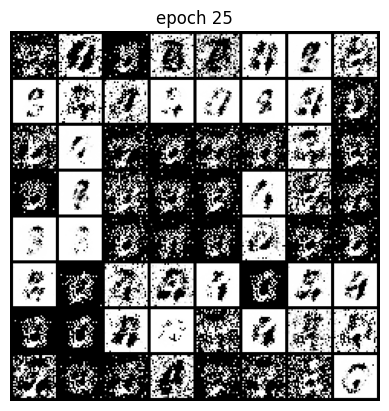

Epoch 25 of 100
Generator loss: -0.73547709, Discriminator loss: 0.00000001


118it [00:16,  7.08it/s]                                                                                               


Epoch 26 of 100
Generator loss: -0.74687380, Discriminator loss: 0.00000000


118it [00:16,  7.17it/s]                                                                                               


Epoch 27 of 100
Generator loss: -0.74023038, Discriminator loss: 0.00000000


118it [00:16,  7.08it/s]                                                                                               


Epoch 28 of 100
Generator loss: -0.75416976, Discriminator loss: 0.00000000


118it [00:16,  7.19it/s]                                                                                               


Epoch 29 of 100
Generator loss: -0.75137585, Discriminator loss: 0.00000000


118it [00:16,  7.26it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


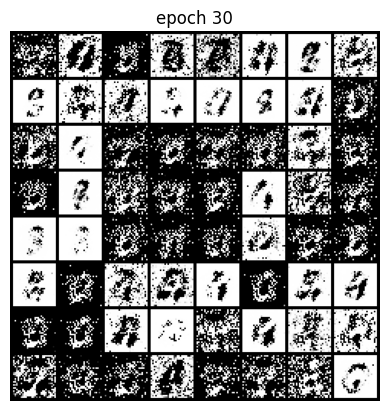

Epoch 30 of 100
Generator loss: -0.74365920, Discriminator loss: 0.00000000


118it [00:16,  7.21it/s]                                                                                               


Epoch 31 of 100
Generator loss: -0.73703784, Discriminator loss: 0.00000002


118it [00:16,  7.20it/s]                                                                                               


Epoch 32 of 100
Generator loss: -0.74823159, Discriminator loss: 0.00000000


118it [00:16,  7.27it/s]                                                                                               


Epoch 33 of 100
Generator loss: -0.74626619, Discriminator loss: 0.00000000


118it [00:16,  7.27it/s]                                                                                               


Epoch 34 of 100
Generator loss: -0.74560958, Discriminator loss: 0.00000000


118it [00:16,  7.22it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


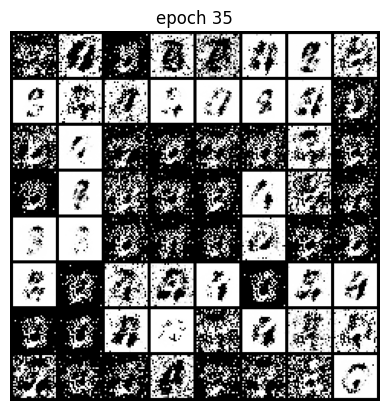

Epoch 35 of 100
Generator loss: -0.74578148, Discriminator loss: 0.00000000


118it [00:17,  6.90it/s]                                                                                               


Epoch 36 of 100
Generator loss: -0.75269139, Discriminator loss: 0.00000000


118it [00:16,  7.21it/s]                                                                                               


Epoch 37 of 100
Generator loss: -0.74565649, Discriminator loss: 0.00000000


118it [00:16,  7.18it/s]                                                                                               


Epoch 38 of 100
Generator loss: -0.76162326, Discriminator loss: 0.00000000


118it [00:16,  7.19it/s]                                                                                               


Epoch 39 of 100
Generator loss: -0.75689620, Discriminator loss: 0.00000000


118it [00:17,  6.79it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


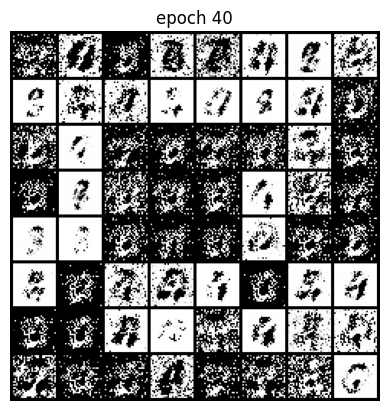

Epoch 40 of 100
Generator loss: -0.75901955, Discriminator loss: 0.00000000


118it [00:16,  7.13it/s]                                                                                               


Epoch 41 of 100
Generator loss: -0.77007794, Discriminator loss: 0.00000001


118it [00:16,  7.17it/s]                                                                                               


Epoch 42 of 100
Generator loss: -0.75709254, Discriminator loss: 0.00000000


118it [00:16,  7.24it/s]                                                                                               


Epoch 43 of 100
Generator loss: -0.75658631, Discriminator loss: 0.00000000


118it [00:16,  7.09it/s]                                                                                               


Epoch 44 of 100
Generator loss: -0.76037240, Discriminator loss: 0.00000000


118it [00:16,  7.19it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


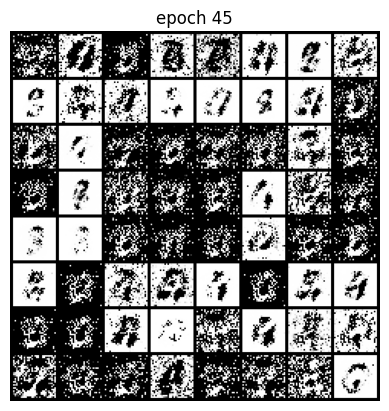

Epoch 45 of 100
Generator loss: -0.76128262, Discriminator loss: 0.00000000


118it [00:16,  7.18it/s]                                                                                               


Epoch 46 of 100
Generator loss: -0.75499159, Discriminator loss: 0.00000000


118it [00:16,  7.24it/s]                                                                                               


Epoch 47 of 100
Generator loss: -0.75361544, Discriminator loss: 0.00000000


118it [00:16,  7.13it/s]                                                                                               


Epoch 48 of 100
Generator loss: -0.75696790, Discriminator loss: 0.00000000


118it [00:16,  7.26it/s]                                                                                               


Epoch 49 of 100
Generator loss: -0.75696075, Discriminator loss: 0.00000000


118it [00:16,  7.22it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


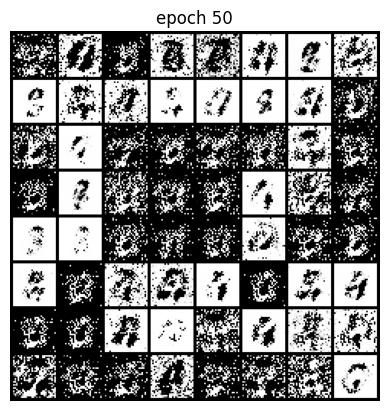

Epoch 50 of 100
Generator loss: -0.75898319, Discriminator loss: 0.00000004


118it [00:16,  7.18it/s]                                                                                               


Epoch 51 of 100
Generator loss: -0.75603110, Discriminator loss: 0.00000000


118it [00:17,  6.90it/s]                                                                                               


Epoch 52 of 100
Generator loss: -0.75588369, Discriminator loss: 0.00000000


118it [00:16,  7.20it/s]                                                                                               


Epoch 53 of 100
Generator loss: -0.76342994, Discriminator loss: 0.00000000


118it [00:16,  7.34it/s]                                                                                               


Epoch 54 of 100
Generator loss: -0.76478183, Discriminator loss: 0.00000000


118it [00:16,  7.24it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


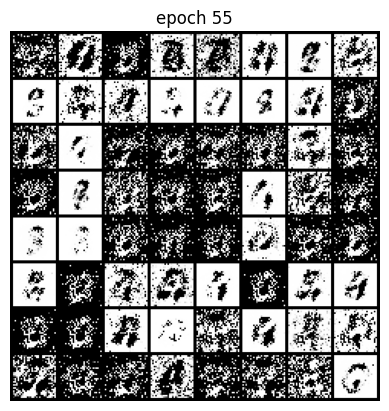

Epoch 55 of 100
Generator loss: -0.75024003, Discriminator loss: 0.00000000


118it [00:16,  7.34it/s]                                                                                               


Epoch 56 of 100
Generator loss: -0.77467757, Discriminator loss: 0.00000000


118it [00:16,  7.28it/s]                                                                                               


Epoch 57 of 100
Generator loss: -0.76595771, Discriminator loss: 0.00000000


118it [00:16,  7.30it/s]                                                                                               


Epoch 58 of 100
Generator loss: -0.77213299, Discriminator loss: 0.00000000


118it [00:16,  7.29it/s]                                                                                               


Epoch 59 of 100
Generator loss: -0.77747905, Discriminator loss: 0.00000000


118it [00:16,  7.30it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


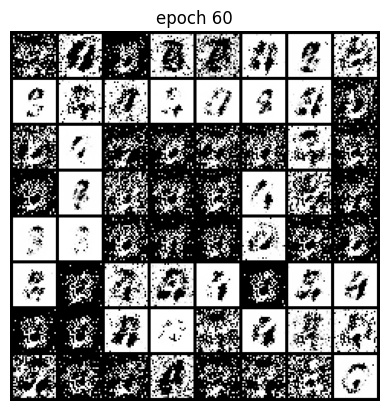

Epoch 60 of 100
Generator loss: -0.76995456, Discriminator loss: 0.00000000


118it [00:16,  7.36it/s]                                                                                               


Epoch 61 of 100
Generator loss: -0.77902448, Discriminator loss: 0.00000000


118it [00:16,  7.27it/s]                                                                                               


Epoch 62 of 100
Generator loss: -0.77153063, Discriminator loss: 0.00000000


118it [00:16,  7.30it/s]                                                                                               


Epoch 63 of 100
Generator loss: -0.76637465, Discriminator loss: 0.00000000


118it [00:16,  7.17it/s]                                                                                               


Epoch 64 of 100
Generator loss: -0.77045208, Discriminator loss: 0.00000000


118it [00:16,  7.23it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


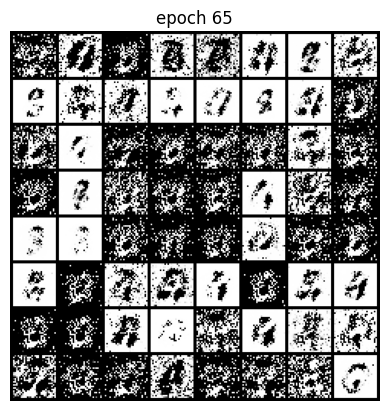

Epoch 65 of 100
Generator loss: -0.76365185, Discriminator loss: 0.00000000


118it [00:16,  7.37it/s]                                                                                               


Epoch 66 of 100
Generator loss: -0.77120632, Discriminator loss: 0.00000000


118it [00:16,  7.24it/s]                                                                                               


Epoch 67 of 100
Generator loss: -0.77868533, Discriminator loss: 0.00000000


118it [00:16,  7.25it/s]                                                                                               


Epoch 68 of 100
Generator loss: -0.77687502, Discriminator loss: 0.00000000


118it [00:16,  7.26it/s]                                                                                               


Epoch 69 of 100
Generator loss: -0.76706773, Discriminator loss: 0.00000000


118it [00:16,  7.33it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


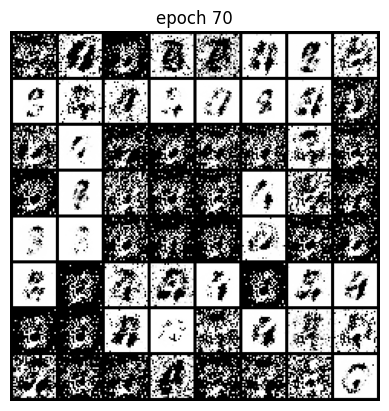

Epoch 70 of 100
Generator loss: -0.78756297, Discriminator loss: 0.00000000


118it [00:15,  7.45it/s]                                                                                               


Epoch 71 of 100
Generator loss: -0.78156978, Discriminator loss: 0.00000000


118it [00:15,  7.41it/s]                                                                                               


Epoch 72 of 100
Generator loss: -0.77525061, Discriminator loss: 0.00000000


118it [00:16,  7.27it/s]                                                                                               


Epoch 73 of 100
Generator loss: -0.77933007, Discriminator loss: 0.00000000


118it [00:15,  7.42it/s]                                                                                               


Epoch 74 of 100
Generator loss: -0.78145617, Discriminator loss: 0.00000000


118it [00:15,  7.38it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


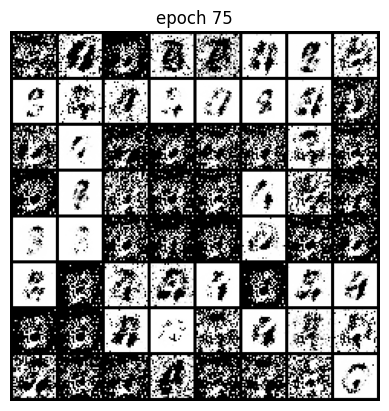

Epoch 75 of 100
Generator loss: -0.78570616, Discriminator loss: 0.00000000


118it [00:15,  7.38it/s]                                                                                               


Epoch 76 of 100
Generator loss: -0.78901422, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                                                                                               


Epoch 77 of 100
Generator loss: -0.78935254, Discriminator loss: 0.00000000


118it [00:16,  7.27it/s]                                                                                               


Epoch 78 of 100
Generator loss: -0.78672779, Discriminator loss: 0.00000000


118it [00:15,  7.40it/s]                                                                                               


Epoch 79 of 100
Generator loss: -0.78836632, Discriminator loss: 0.00000000


118it [00:16,  7.32it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


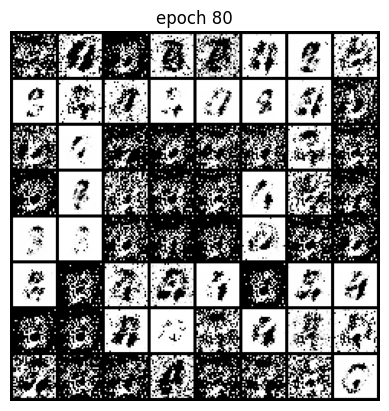

Epoch 80 of 100
Generator loss: -0.77970392, Discriminator loss: 0.00000000


118it [00:15,  7.43it/s]                                                                                               


Epoch 81 of 100
Generator loss: -0.82055992, Discriminator loss: 0.00000000


118it [00:15,  7.45it/s]                                                                                               


Epoch 82 of 100
Generator loss: -0.81808496, Discriminator loss: 0.00000000


118it [00:15,  7.48it/s]                                                                                               


Epoch 83 of 100
Generator loss: -0.81552660, Discriminator loss: 0.00000000


118it [00:15,  7.43it/s]                                                                                               


Epoch 84 of 100
Generator loss: -0.81621057, Discriminator loss: 0.00000000


118it [00:15,  7.45it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


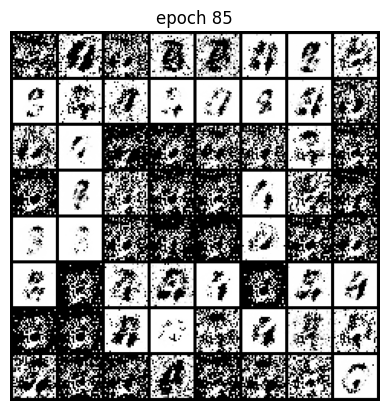

Epoch 85 of 100
Generator loss: -0.81274527, Discriminator loss: 0.00000000


118it [00:15,  7.39it/s]                                                                                               


Epoch 86 of 100
Generator loss: -0.82185769, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                                                                                               


Epoch 87 of 100
Generator loss: -0.82341498, Discriminator loss: 0.00000000


118it [00:15,  7.49it/s]                                                                                               


Epoch 88 of 100
Generator loss: -0.81761521, Discriminator loss: 0.00000000


118it [00:15,  7.48it/s]                                                                                               


Epoch 89 of 100
Generator loss: -0.81364787, Discriminator loss: 0.00000000


118it [00:15,  7.43it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


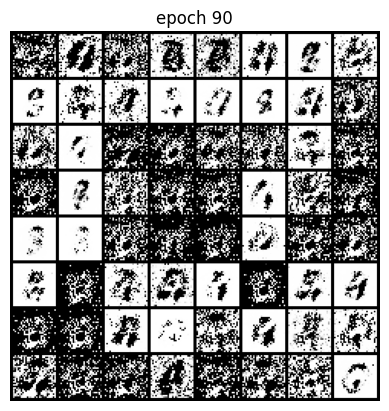

Epoch 90 of 100
Generator loss: -0.82250327, Discriminator loss: 0.00000000


118it [00:15,  7.57it/s]                                                                                               


Epoch 91 of 100
Generator loss: -0.81768841, Discriminator loss: 0.00000000


118it [00:15,  7.61it/s]                                                                                               


Epoch 92 of 100
Generator loss: -0.81426001, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                                                                                               


Epoch 93 of 100
Generator loss: -0.82122648, Discriminator loss: 0.00000000


118it [00:15,  7.53it/s]                                                                                               


Epoch 94 of 100
Generator loss: -0.80350024, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


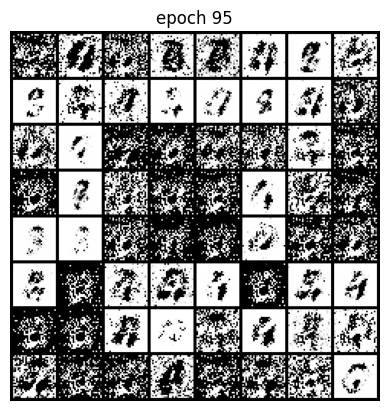

Epoch 95 of 100
Generator loss: -0.82316566, Discriminator loss: 0.00000001


118it [00:15,  7.54it/s]                                                                                               


Epoch 96 of 100
Generator loss: -0.81906980, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                                                                                               


Epoch 97 of 100
Generator loss: -0.81699431, Discriminator loss: 0.00000000


118it [00:16,  7.18it/s]                                                                                               


Epoch 98 of 100
Generator loss: -0.82004941, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                                                                                               


Epoch 99 of 100
Generator loss: -0.82709014, Discriminator loss: 0.00000000


118it [00:15,  7.46it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


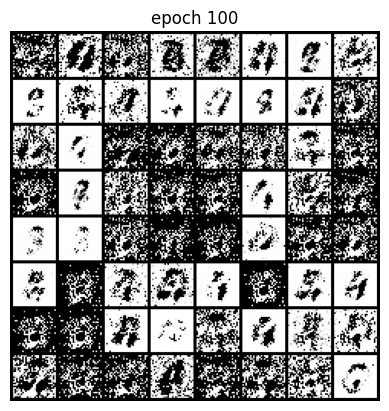

Epoch 100 of 100
Generator loss: -0.81040013, Discriminator loss: 0.00000000


In [27]:
torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        optim_g.zero_grad()
        optim_d.zero_grad()
        
        x, _ = data[0], data[1]
        real_labels = label_real(sample_size)
        fake_labels = label_fake(sample_size)

        D_x = discriminator(x)
        loss_d1 = criterion(D_x, label_real(x.shape[0]))
        loss_d1.backward()

        fake_img = generator(noise)
        D_G_z = discriminator(fake_img.detach())
        loss_d2 = criterion(D_G_z, fake_labels)
        loss_d2.backward()

        loss_d = loss_d1 + loss_d2

        optim_d.step()
        
        loss_g = -1*criterion(discriminator(fake_img), real_labels)
        loss_g.backward()
        optim_g.step()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach())
    losses_d.append(epoch_loss_d.detach())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

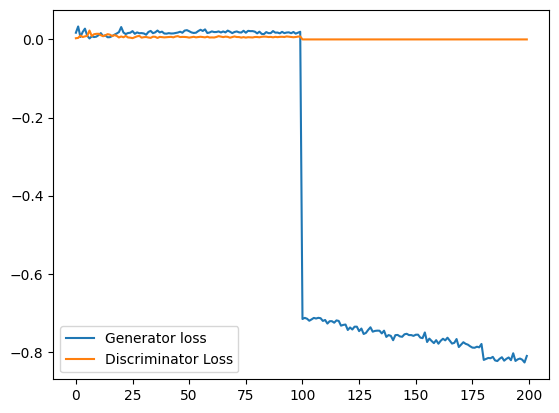

In [28]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_b.png')

# 1.c)

In [34]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)

In [35]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

118it [00:20,  5.68it/s]                                                                                               


Epoch 1 of 100
Generator loss: 0.02067263, Discriminator loss: 0.00308982


118it [00:20,  5.78it/s]                                                                                               


Epoch 2 of 100
Generator loss: 0.03204072, Discriminator loss: 0.00632951


118it [00:20,  5.83it/s]                                                                                               


Epoch 3 of 100
Generator loss: 0.01961019, Discriminator loss: 0.00708484


118it [00:20,  5.81it/s]                                                                                               


Epoch 4 of 100
Generator loss: 0.00686286, Discriminator loss: 0.01244787


118it [00:20,  5.80it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


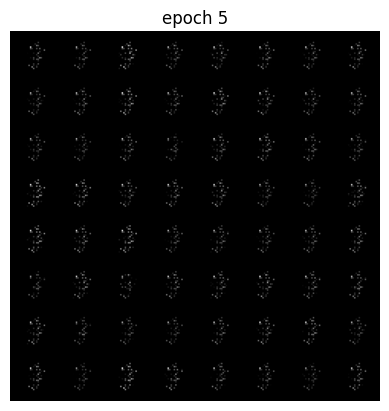

Epoch 5 of 100
Generator loss: 0.00690739, Discriminator loss: 0.01231860


118it [00:20,  5.89it/s]                                                                                               


Epoch 6 of 100
Generator loss: 0.01743824, Discriminator loss: 0.00258377


118it [00:20,  5.79it/s]                                                                                               


Epoch 7 of 100
Generator loss: 0.00057621, Discriminator loss: 0.02679852


118it [00:20,  5.84it/s]                                                                                               


Epoch 8 of 100
Generator loss: 0.00377258, Discriminator loss: 0.01223171


118it [00:20,  5.84it/s]                                                                                               


Epoch 9 of 100
Generator loss: 0.00636176, Discriminator loss: 0.01105802


118it [00:20,  5.84it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


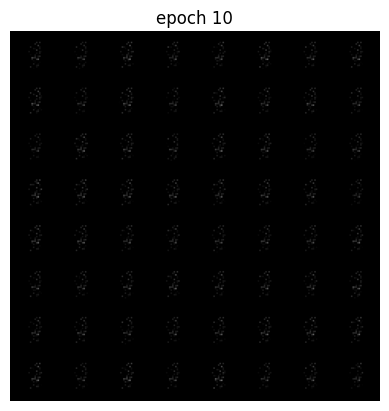

Epoch 10 of 100
Generator loss: 0.00891813, Discriminator loss: 0.00811558


118it [00:20,  5.81it/s]                                                                                               


Epoch 11 of 100
Generator loss: 0.01936929, Discriminator loss: 0.00790169


118it [00:20,  5.81it/s]                                                                                               


Epoch 12 of 100
Generator loss: 0.00972460, Discriminator loss: 0.00734308


118it [00:20,  5.80it/s]                                                                                               


Epoch 13 of 100
Generator loss: 0.00742548, Discriminator loss: 0.01264183


118it [00:20,  5.81it/s]                                                                                               


Epoch 14 of 100
Generator loss: 0.00932578, Discriminator loss: 0.01144354


118it [00:20,  5.82it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


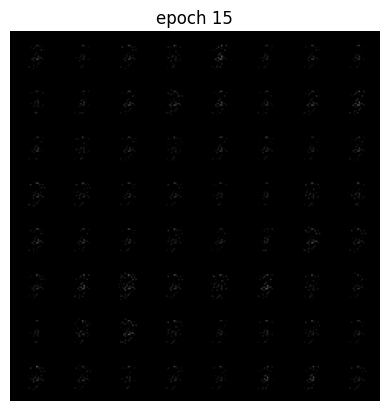

Epoch 15 of 100
Generator loss: 0.00469272, Discriminator loss: 0.01328067


118it [00:20,  5.82it/s]                                                                                               


Epoch 16 of 100
Generator loss: 0.00696140, Discriminator loss: 0.01026490


118it [00:20,  5.86it/s]                                                                                               


Epoch 17 of 100
Generator loss: 0.00863008, Discriminator loss: 0.01354198


118it [00:20,  5.84it/s]                                                                                               


Epoch 18 of 100
Generator loss: 0.01086264, Discriminator loss: 0.00789138


118it [00:20,  5.79it/s]                                                                                               


Epoch 19 of 100
Generator loss: 0.01742796, Discriminator loss: 0.00538702


118it [00:20,  5.84it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


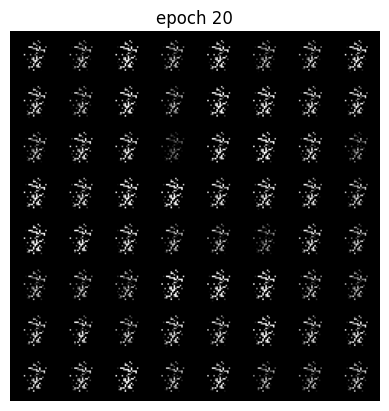

Epoch 20 of 100
Generator loss: 0.03355854, Discriminator loss: 0.00557091


118it [00:20,  5.84it/s]                                                                                               


Epoch 21 of 100
Generator loss: 0.01485655, Discriminator loss: 0.00642645


118it [00:20,  5.82it/s]                                                                                               


Epoch 22 of 100
Generator loss: 0.02121401, Discriminator loss: 0.00640581


118it [00:20,  5.80it/s]                                                                                               


Epoch 23 of 100
Generator loss: 0.01258953, Discriminator loss: 0.00776664


118it [00:20,  5.76it/s]                                                                                               


Epoch 24 of 100
Generator loss: 0.02316872, Discriminator loss: 0.00819955


118it [00:20,  5.77it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


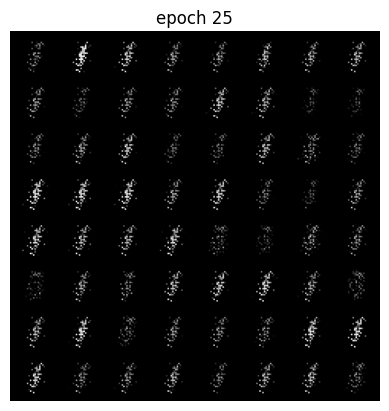

Epoch 25 of 100
Generator loss: 0.01556884, Discriminator loss: 0.00626897


118it [00:20,  5.83it/s]                                                                                               


Epoch 26 of 100
Generator loss: 0.01385834, Discriminator loss: 0.00750710


118it [00:20,  5.80it/s]                                                                                               


Epoch 27 of 100
Generator loss: 0.01935595, Discriminator loss: 0.00764798


118it [00:20,  5.83it/s]                                                                                               


Epoch 28 of 100
Generator loss: 0.01175221, Discriminator loss: 0.00877983


118it [00:20,  5.83it/s]                                                                                               


Epoch 29 of 100
Generator loss: 0.01306306, Discriminator loss: 0.00928249


118it [00:20,  5.81it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


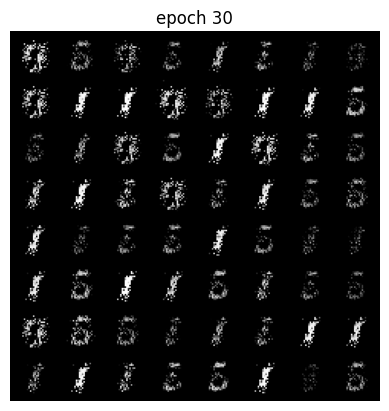

Epoch 30 of 100
Generator loss: 0.01547962, Discriminator loss: 0.00691883


118it [00:20,  5.77it/s]                                                                                               


Epoch 31 of 100
Generator loss: 0.01129295, Discriminator loss: 0.00679537


118it [00:20,  5.80it/s]                                                                                               


Epoch 32 of 100
Generator loss: 0.01279761, Discriminator loss: 0.00845558


118it [00:20,  5.79it/s]                                                                                               


Epoch 33 of 100
Generator loss: 0.01375525, Discriminator loss: 0.00773808


118it [00:20,  5.73it/s]                                                                                               


Epoch 34 of 100
Generator loss: 0.01758813, Discriminator loss: 0.00567700


118it [00:20,  5.79it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


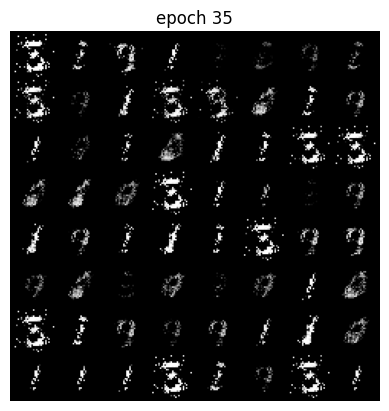

Epoch 35 of 100
Generator loss: 0.01530306, Discriminator loss: 0.00669838


118it [00:19,  5.99it/s]                                                                                               


Epoch 36 of 100
Generator loss: 0.01788654, Discriminator loss: 0.00861272


118it [00:19,  6.02it/s]                                                                                               


Epoch 37 of 100
Generator loss: 0.01150170, Discriminator loss: 0.00832621


118it [00:19,  5.97it/s]                                                                                               


Epoch 38 of 100
Generator loss: 0.01530317, Discriminator loss: 0.00791572


118it [00:19,  6.03it/s]                                                                                               


Epoch 39 of 100
Generator loss: 0.01648006, Discriminator loss: 0.00502599


118it [00:19,  6.01it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


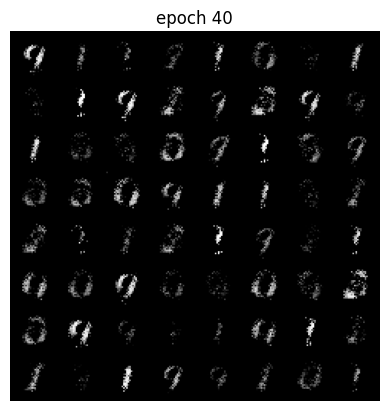

Epoch 40 of 100
Generator loss: 0.01542138, Discriminator loss: 0.00767978


118it [00:19,  6.04it/s]                                                                                               


Epoch 41 of 100
Generator loss: 0.00973812, Discriminator loss: 0.00898640


118it [00:19,  6.01it/s]                                                                                               


Epoch 42 of 100
Generator loss: 0.01225210, Discriminator loss: 0.00614927


118it [00:19,  5.96it/s]                                                                                               


Epoch 43 of 100
Generator loss: 0.01827959, Discriminator loss: 0.00313553


118it [00:19,  6.00it/s]                                                                                               


Epoch 44 of 100
Generator loss: 0.01824707, Discriminator loss: 0.00823246


118it [00:20,  5.76it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


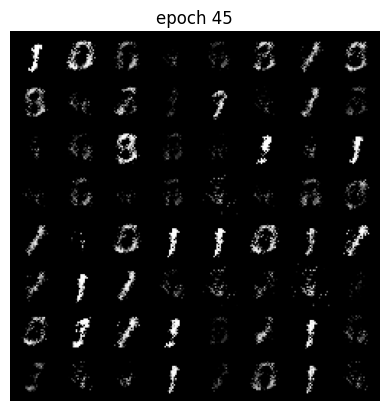

Epoch 45 of 100
Generator loss: 0.01558232, Discriminator loss: 0.00637581


118it [00:20,  5.75it/s]                                                                                               


Epoch 46 of 100
Generator loss: 0.01174223, Discriminator loss: 0.01044600


118it [00:20,  5.85it/s]                                                                                               


Epoch 47 of 100
Generator loss: 0.01401075, Discriminator loss: 0.00796851


118it [00:21,  5.52it/s]                                                                                               


Epoch 48 of 100
Generator loss: 0.01347291, Discriminator loss: 0.00682552


118it [00:20,  5.87it/s]                                                                                               


Epoch 49 of 100
Generator loss: 0.01619532, Discriminator loss: 0.00629652


118it [00:19,  6.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


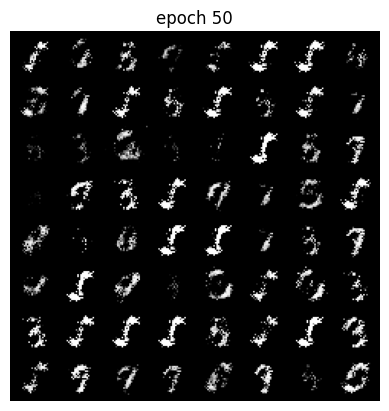

Epoch 50 of 100
Generator loss: 0.01804799, Discriminator loss: 0.00675534


118it [00:19,  6.17it/s]                                                                                               


Epoch 51 of 100
Generator loss: 0.01859388, Discriminator loss: 0.00563127


118it [00:19,  6.04it/s]                                                                                               


Epoch 52 of 100
Generator loss: 0.01836086, Discriminator loss: 0.00510054


118it [00:19,  6.20it/s]                                                                                               


Epoch 53 of 100
Generator loss: 0.02047426, Discriminator loss: 0.00471220


118it [00:19,  6.16it/s]                                                                                               


Epoch 54 of 100
Generator loss: 0.01795927, Discriminator loss: 0.00852017


118it [00:18,  6.22it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


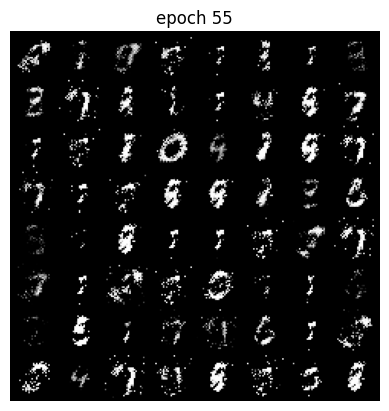

Epoch 55 of 100
Generator loss: 0.01917456, Discriminator loss: 0.00785659


118it [00:19,  6.12it/s]                                                                                               


Epoch 56 of 100
Generator loss: 0.01629133, Discriminator loss: 0.00941811


118it [00:19,  6.06it/s]                                                                                               


Epoch 57 of 100
Generator loss: 0.01523436, Discriminator loss: 0.00599230


118it [00:19,  6.12it/s]                                                                                               


Epoch 58 of 100
Generator loss: 0.01842384, Discriminator loss: 0.00493270


118it [00:19,  6.14it/s]                                                                                               


Epoch 59 of 100
Generator loss: 0.01522650, Discriminator loss: 0.00587731


118it [00:19,  6.14it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


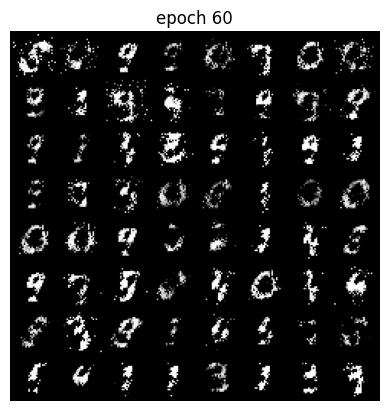

Epoch 60 of 100
Generator loss: 0.01464414, Discriminator loss: 0.00699371


118it [00:19,  6.11it/s]                                                                                               


Epoch 61 of 100
Generator loss: 0.01866808, Discriminator loss: 0.00531429


118it [00:20,  5.65it/s]                                                                                               


Epoch 62 of 100
Generator loss: 0.01715486, Discriminator loss: 0.00622670


118it [00:22,  5.21it/s]                                                                                               


Epoch 63 of 100
Generator loss: 0.01562311, Discriminator loss: 0.00759845


118it [00:20,  5.84it/s]                                                                                               


Epoch 64 of 100
Generator loss: 0.01594082, Discriminator loss: 0.00565357


118it [00:20,  5.85it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


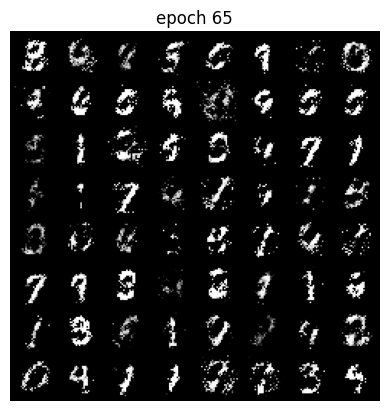

Epoch 65 of 100
Generator loss: 0.01471362, Discriminator loss: 0.00567269


118it [00:19,  5.96it/s]                                                                                               


Epoch 66 of 100
Generator loss: 0.01838521, Discriminator loss: 0.00745505


118it [00:20,  5.81it/s]                                                                                               


Epoch 67 of 100
Generator loss: 0.01365162, Discriminator loss: 0.00779238


118it [00:20,  5.69it/s]                                                                                               


Epoch 68 of 100
Generator loss: 0.01623140, Discriminator loss: 0.00536689


118it [00:20,  5.71it/s]                                                                                               


Epoch 69 of 100
Generator loss: 0.01453559, Discriminator loss: 0.00942608


118it [00:20,  5.86it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


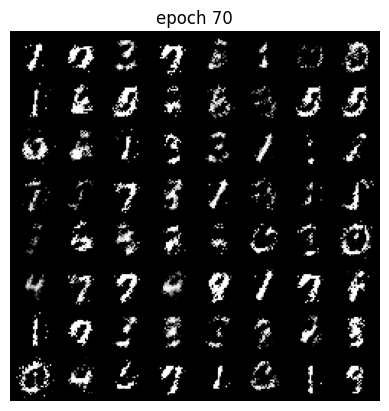

Epoch 70 of 100
Generator loss: 0.01391432, Discriminator loss: 0.00740208


118it [00:21,  5.60it/s]                                                                                               


Epoch 71 of 100
Generator loss: 0.01933202, Discriminator loss: 0.00899582


118it [00:20,  5.84it/s]                                                                                               


Epoch 72 of 100
Generator loss: 0.01499692, Discriminator loss: 0.00690480


118it [00:19,  5.98it/s]                                                                                               


Epoch 73 of 100
Generator loss: 0.01408319, Discriminator loss: 0.00846300


118it [00:20,  5.78it/s]                                                                                               


Epoch 74 of 100
Generator loss: 0.02034188, Discriminator loss: 0.00704327


118it [00:20,  5.85it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


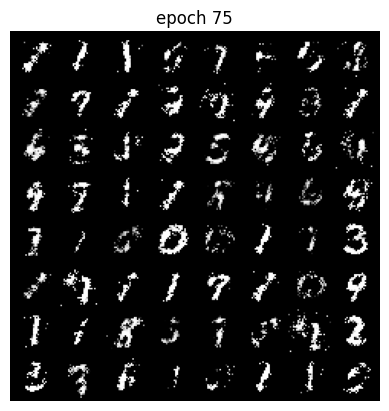

Epoch 75 of 100
Generator loss: 0.01755862, Discriminator loss: 0.00614734


118it [00:20,  5.69it/s]                                                                                               


Epoch 76 of 100
Generator loss: 0.02079803, Discriminator loss: 0.00646979


118it [00:20,  5.76it/s]                                                                                               


Epoch 77 of 100
Generator loss: 0.02020806, Discriminator loss: 0.00671008


118it [00:20,  5.68it/s]                                                                                               


Epoch 78 of 100
Generator loss: 0.02018639, Discriminator loss: 0.00596165


118it [00:20,  5.81it/s]                                                                                               


Epoch 79 of 100
Generator loss: 0.02251285, Discriminator loss: 0.00484208


118it [00:20,  5.73it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


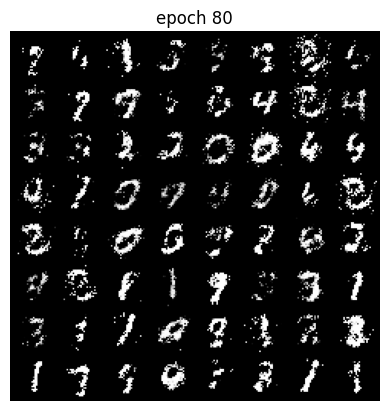

Epoch 80 of 100
Generator loss: 0.01789533, Discriminator loss: 0.00579498


118it [00:19,  6.03it/s]                                                                                               


Epoch 81 of 100
Generator loss: 0.01755268, Discriminator loss: 0.00510763


118it [00:19,  6.02it/s]                                                                                               


Epoch 82 of 100
Generator loss: 0.01691707, Discriminator loss: 0.00765259


118it [00:20,  5.78it/s]                                                                                               


Epoch 83 of 100
Generator loss: 0.02152296, Discriminator loss: 0.00571065


118it [00:19,  6.12it/s]                                                                                               


Epoch 84 of 100
Generator loss: 0.01782835, Discriminator loss: 0.00757729


118it [00:19,  6.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


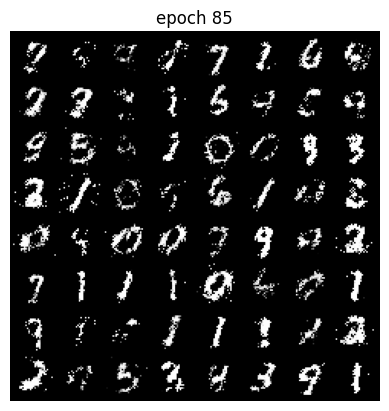

Epoch 85 of 100
Generator loss: 0.02046248, Discriminator loss: 0.00600338


118it [00:19,  6.15it/s]                                                                                               


Epoch 86 of 100
Generator loss: 0.02000222, Discriminator loss: 0.00672080


118it [00:19,  6.20it/s]                                                                                               


Epoch 87 of 100
Generator loss: 0.01689718, Discriminator loss: 0.00671711


118it [00:19,  6.19it/s]                                                                                               


Epoch 88 of 100
Generator loss: 0.01569873, Discriminator loss: 0.00730191


118it [00:19,  6.20it/s]                                                                                               


Epoch 89 of 100
Generator loss: 0.02244571, Discriminator loss: 0.00530349


118it [00:19,  6.17it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


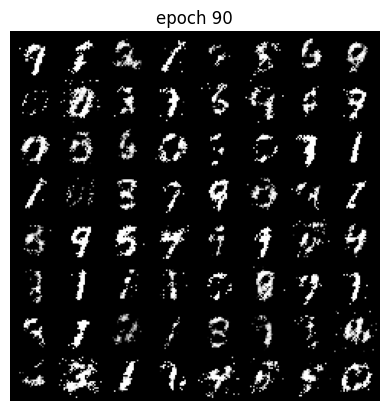

Epoch 90 of 100
Generator loss: 0.01823766, Discriminator loss: 0.00611853


118it [00:19,  6.18it/s]                                                                                               


Epoch 91 of 100
Generator loss: 0.01395021, Discriminator loss: 0.00801241


118it [00:19,  6.18it/s]                                                                                               


Epoch 92 of 100
Generator loss: 0.01320825, Discriminator loss: 0.00803830


118it [00:19,  6.18it/s]                                                                                               


Epoch 93 of 100
Generator loss: 0.01845588, Discriminator loss: 0.00574951


118it [00:19,  6.17it/s]                                                                                               


Epoch 94 of 100
Generator loss: 0.01437403, Discriminator loss: 0.00795154


118it [00:19,  6.15it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


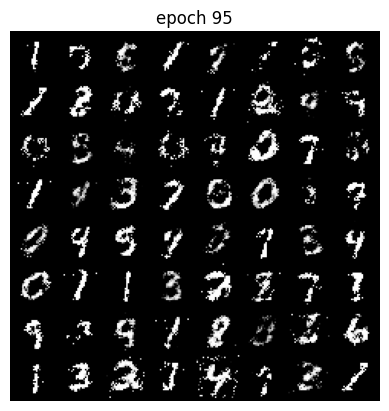

Epoch 95 of 100
Generator loss: 0.01493575, Discriminator loss: 0.00478809


118it [00:18,  6.23it/s]                                                                                               


Epoch 96 of 100
Generator loss: 0.01496457, Discriminator loss: 0.00742301


118it [00:19,  6.15it/s]                                                                                               


Epoch 97 of 100
Generator loss: 0.01693002, Discriminator loss: 0.00669823


118it [00:19,  6.19it/s]                                                                                               


Epoch 98 of 100
Generator loss: 0.01668515, Discriminator loss: 0.00623113


118it [00:18,  6.24it/s]                                                                                               


Epoch 99 of 100
Generator loss: 0.01302627, Discriminator loss: 0.00695049


118it [00:19,  5.94it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


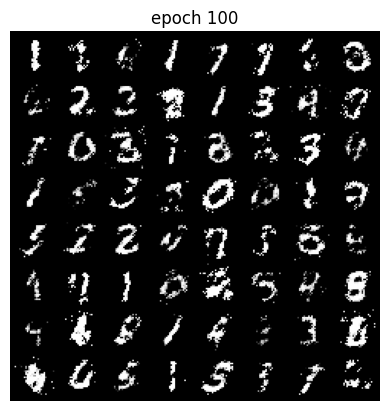

Epoch 100 of 100
Generator loss: 0.01334960, Discriminator loss: 0.00826190


In [36]:
torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        optim_g.zero_grad()
        optim_d.zero_grad()
        
        x, _ = data[0], data[1]
        real_labels = label_real(sample_size)
        fake_labels = label_fake(sample_size)

        D_x = discriminator(x)
        loss_d1 = criterion(D_x, label_real(x.shape[0]))
        loss_d1.backward()

        fake_img = generator(noise)
        D_G_z = discriminator(fake_img.detach())
        loss_d2 = criterion(D_G_z, fake_labels)
        loss_d2.backward()

        loss_d = loss_d1 + loss_d2

        optim_d.step()
        
        loss_g = criterion(discriminator(fake_img), real_labels)
        loss_g.backward(retain_graph=True)
        optim_g.step()

        if epoch < 5:
            fake_img = generator(noise)
            optim_d.zero_grad()
            loss_g = criterion(discriminator(fake_img), real_labels)
            loss_g.backward(retain_graph=True)
            optim_g.step()

            fake_img = generator(noise)
            optim_d.zero_grad()
            loss_g = criterion(discriminator(fake_img), real_labels)
            loss_g.backward()
            optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach())
    losses_d.append(epoch_loss_d.detach())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

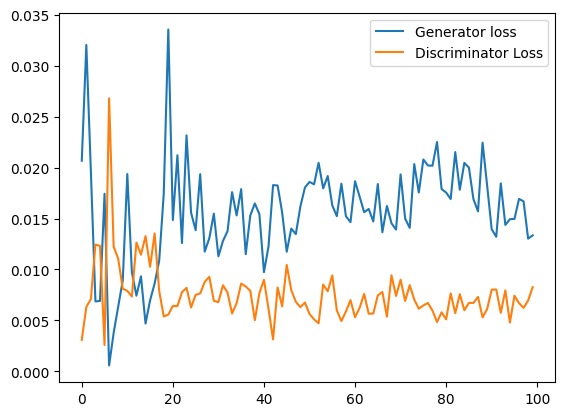

In [37]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_c.png')

---

# 2. Directed Graphical Model

---

# 3. Chow-Liu Algorithm

In [10]:
import numpy as np

index = {'X': 0, 'Y': 1, 'Z': 2}
counts = {
    (1, 1, 1): 36,
    (1, 1, 0): 4,
    (1, 0, 1): 2,
    (1, 0, 0): 8,
    (0, 1, 1): 9,
    (0, 1, 0): 1,
    (0, 0, 1): 8,
    (0, 0, 0): 32,
}

In [11]:
iv_probs = np.zeros((3, 2))
for i in range(3):
    count_pos, count_neg = 0, 0
    for k, v in counts.items():
        if k[i] == 0:
            count_neg += v
        else:
            count_pos += v
    iv_probs[i][0] = count_neg / (count_pos + count_neg)
    iv_probs[i][1] = count_pos / (count_pos + count_neg)

iv_probs

array([[0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.45, 0.55]])

In [13]:
joint_probs = np.zeros((3, 4))
for i in range(3):
    j = (i+1)%3
    count_00, count_01, count_10, count_11 = 0, 0, 0, 0
    for k, v in counts.items():
        if k[i] == 0 and k[j] == 0:
            count_00 += v
        if k[i] == 0 and k[j] == 1:
            count_01 += v
        if k[i] == 1 and k[j] == 0:
            count_10 += v
        if k[i] == 1 and k[j] == 1:
            count_11 += v

    total_count = count_00 + count_01 + count_10 + count_11
    joint_probs[i][0] = count_00 / total_count
    joint_probs[i][1] = count_01 / total_count
    joint_probs[i][2] = count_10 / total_count
    joint_probs[i][3] = count_11 / total_count

joint_probs

array([[0.4 , 0.1 , 0.1 , 0.4 ],
       [0.4 , 0.1 , 0.05, 0.45],
       [0.33, 0.12, 0.17, 0.38]])

## a)

In [21]:
I_XY = 0
for i in range(2):
    for j in range(2):
        I_XY += (joint_probs[0][2*i+j] * np.log(joint_probs[0][2*i+j]/(iv_probs[0][i] * iv_probs[1][j])) / np.log(2))

print("I(X,Y) =", I_XY)

I(X,Y) = 0.2780719051126378


## b)

In [23]:
I_XZ = 0
for i in range(2):
    for j in range(2):
        I_XZ += (joint_probs[2][2*i+j] * np.log(joint_probs[2][2*i+j]/(iv_probs[2][i] * iv_probs[0][j])) / np.log(2))

print("I(X,Z) =", I_XZ)

I(X,Z) = 0.1328449618090321


## c)

In [24]:
I_YZ = 0
for i in range(2):
    for j in range(2):
        I_YZ += (joint_probs[1][2*i+j] * np.log(joint_probs[1][2*i+j]/(iv_probs[1][i] * iv_probs[2][j])) / np.log(2))

print("I(Y,Z) =", I_YZ)

I(Y,Z) = 0.3973126097494865


In [27]:
edges = {(0, 1): I_XY, (1, 2): I_YZ, (2, 0): I_XZ}
edges

{(0, 1): 0.2780719051126378,
 (1, 2): 0.3973126097494865,
 (2, 0): 0.1328449618090321}

## d)
Since, Chow-Liu Algorithm chooses the edges with the highest weights, it'll choose the edges:
1. **X-Y**
2. **Y-Z**

## e)
If **X** is selected as the root, the following directed edges are used:
1. **X $\rightarrow$ Y**
2. **Y $\rightarrow$ Z**